# Using Scratch

# Import Required Librarires

In [279]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

1) Dataset: estimated_numbers.csv

In [280]:
#Load the Data: estimated_numbers.csv

nrowsread=1000
df1= pd.read_csv('estimated_numbers.csv', delimiter=',', nrows=nrowsread)
df1.dataframe= 'estimated_numbers.csv'
df1.shape

(856, 11)

In [281]:
df1.head(7)

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
5,Azerbaijan,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia


In [282]:
#Information of the Data:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
Country                 856 non-null object
Year                    856 non-null int64
No. of cases            856 non-null object
No. of deaths           856 non-null object
No. of cases_median     856 non-null int64
No. of cases_min        544 non-null float64
No. of cases_max        544 non-null float64
No. of deaths_median    856 non-null int64
No. of deaths_min       524 non-null float64
No. of deaths_max       524 non-null float64
WHO Region              856 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 73.6+ KB


In [283]:
#describing the Data:

df1.describe()

,Year,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max
count,856.000000,8.560000e+02,5.440000e+02,5.440000e+02,856.000000,524.000000,524.000000
mean,2013.500000,2.081990e+06,2.157556e+06,4.913741e+06,4713.880841,5619.108779,10149.429389
std,2.292627,6.381892e+06,5.384822e+06,1.102773e+07,13183.312889,12823.714240,20173.783933
min,2010.000000,0.000000e+00,3.000000e+01,4.000000e+01,0.000000,0.000000,1.000000
25%,2011.750000,2.385000e+02,3.900000e+04,7.500000e+04,0.000000,5.000000,180.000000
50%,2013.500000,3.752100e+04,4.980000e+05,1.389000e+06,55.500000,390.000000,3565.000000
75%,2015.250000,1.656628e+06,2.084500e+06,5.277750e+06,4096.000000,6592.500000,12400.000000
max,2017.000000,6.202089e+07,4.388000e+07,8.484000e+07,146734.000000,115000.000000,179000.000000


# PLOTTING

In [284]:
                                           #ColumnDistribution Plot:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()    #finding unique values
    
#Selecting Required attributes
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    #print(nCol)
    
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    #print(nGraphPerRow)
    
#Calculating size for the plot
    plt.figure(num = None, figsize = (8 *nGraphPerRow, 8 *nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i+1)
        columnDf = df.iloc[:, i]
        #print(df.iloc[:, i])
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

#plotting the graph:
        plt.ylabel('counts')
        plt.xticks(rotation = 30)
        plt.title(f'{columnNames[i]} (column {i})', fontsize=20)
        
    #plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()     
    
#Here tight_layout is used to automatically adjust subplot parameters to give specified padding.
#Since the graphs looks neat and fine even without using it, i have commented it.

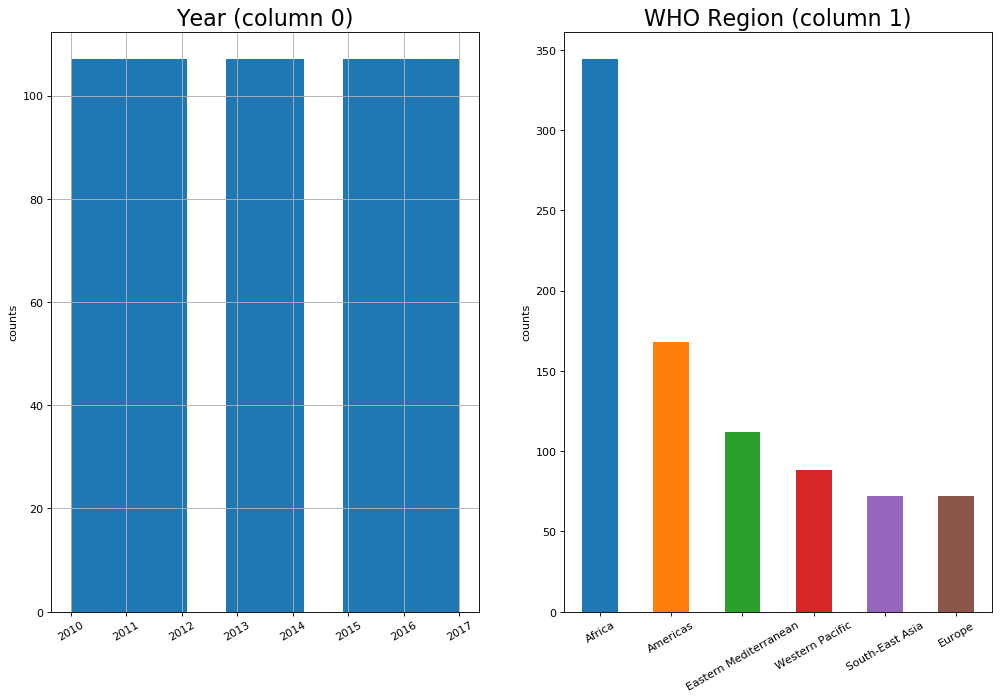

In [285]:
plotPerColumnDistribution(df1, 10, 5)

In [286]:
                                              #Correlation Matrix:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframe
    df = df.dropna('columns')        #removimg missing values
    #print(df)

#Selecting Required attributes    
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

#Calculating Correlation: 
    corr = df.corr()
    #print(corr.columns)
    #print(len(corr.columns))

#plotting the matrix:    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=40)
    plt.yticks(range(len(corr.columns)), corr.columns) 
    plt.gca().xaxis.tick_bottom()
    
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=12)
    plt.show()

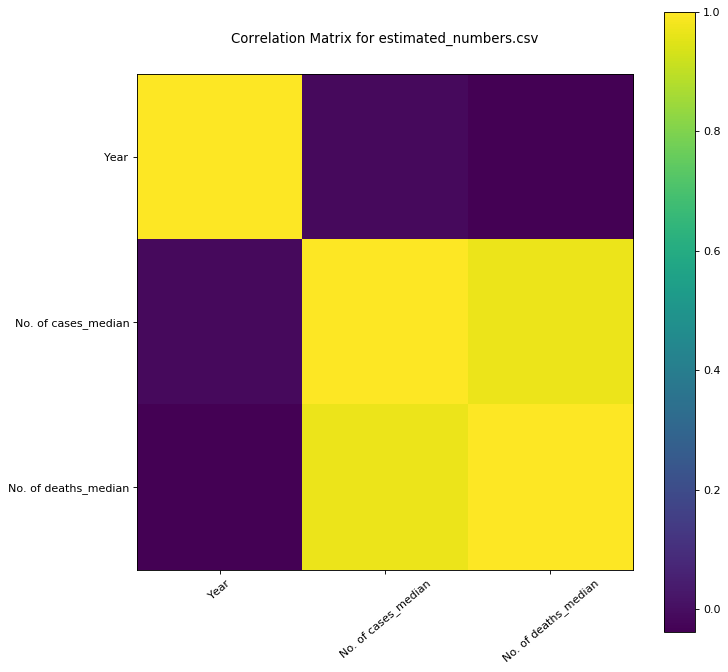

In [287]:
plotCorrelationMatrix(df1, 10)

In [288]:
                                                #Scatter Matrix:

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')             #removimg missing values
    #print(df)
    
#Selecting Required Attributes:
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    #print(columnNames)
    
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    print(corrs)                #printing correlation matrix
    
#plotting:
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.6, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
        
    plt.suptitle('Scatter and Density Plot')
    plt.show()


[[ 1.         -0.00964726 -0.03776892]
 [-0.00964726  1.          0.96965782]
 [-0.03776892  0.96965782  1.        ]]


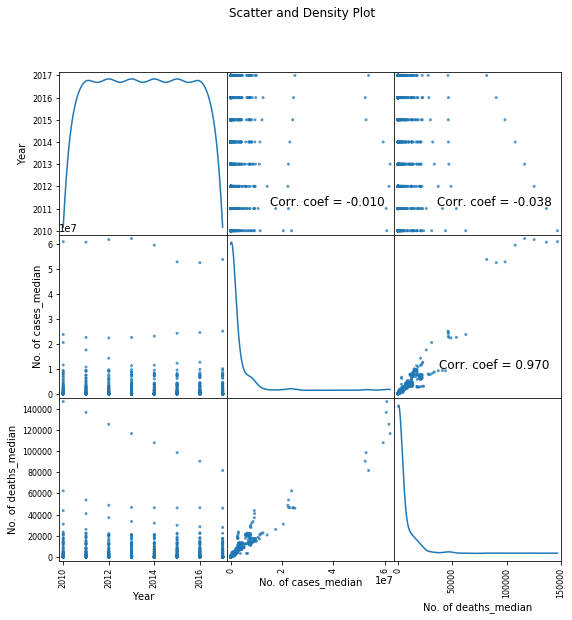

In [289]:
plotScatterMatrix(df1, 9, 12)

2) Dataset: incidence_per_1000_pop_at_risk.csv

In [290]:
#Load the Data: incidence_per_1000_pop_at_risk.csv

nrowsread=1000
df2= pd.read_csv('incidence_per_1000_pop_at_risk.csv', delimiter=',', nrows=nrowsread)
df2.dataframe= 'incidence_per_1000_pop_at_risk.csv'
df2.shape

(1000, 4)

In [291]:
df2.head(7)

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe
5,Azerbaijan,2018,0.00,Europe
6,Bangladesh,2018,0.69,South-East Asia


In [292]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Country         1000 non-null object
Year            1000 non-null int64
No. of cases    1000 non-null float64
WHO Region      1000 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [293]:
df2.describe()

,Year,No. of cases
count,1000.000000,1000.000000
mean,2013.815000,91.642840
std,2.705197,140.154705
min,2009.000000,0.000000
25%,2011.000000,0.140000
50%,2014.000000,7.060000
75%,2016.000000,161.122500
max,2018.000000,585.540000


# PLOTTING

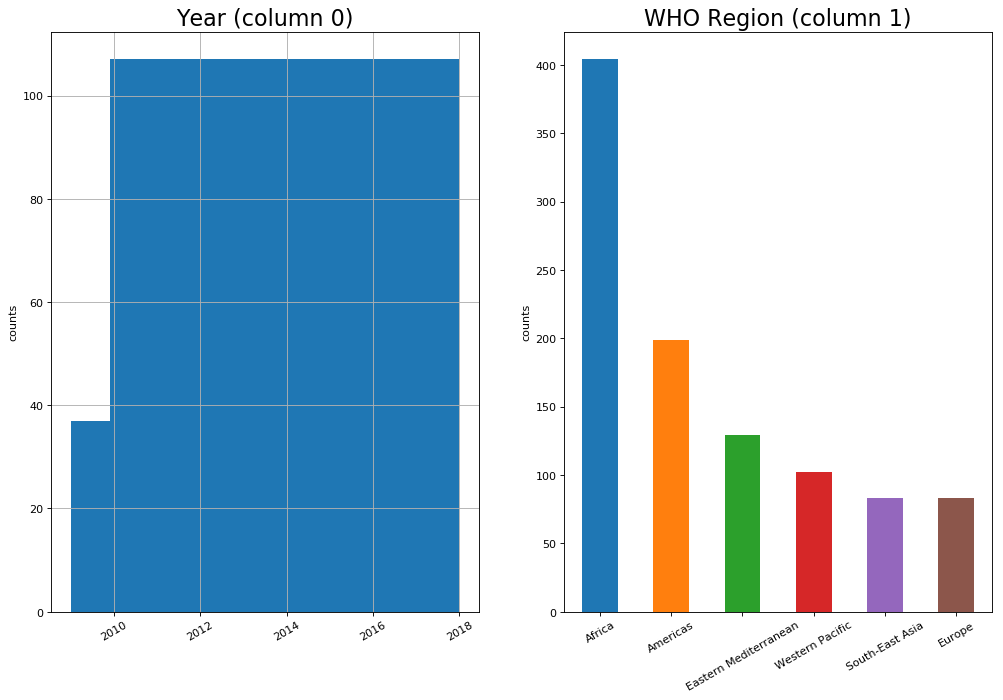

In [294]:
plotPerColumnDistribution(df2, 10, 5)

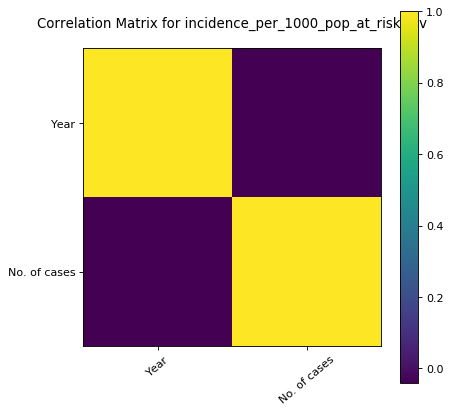

In [295]:
plotCorrelationMatrix(df2, 6)

[[ 1.         -0.04182095]
 [-0.04182095  1.        ]]


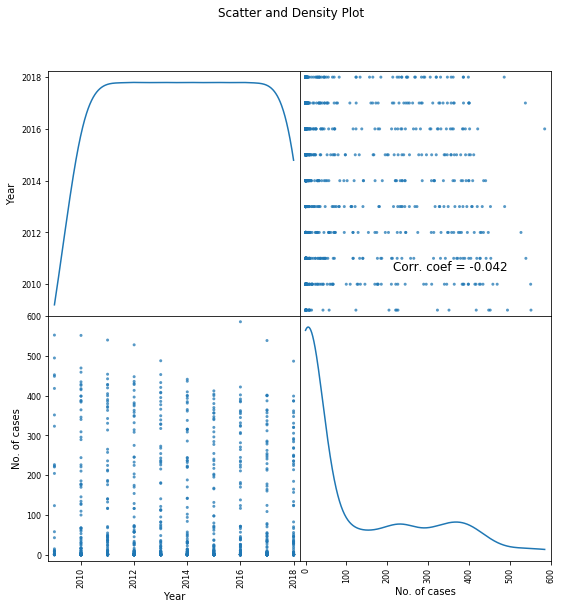

In [296]:
plotScatterMatrix(df2, 9, 12)

3) Dataset: reported_numbers.csv

In [297]:
#Load the Data: reported_numbers.csv

nrowsread=1000
df3= pd.read_csv('reported_numbers.csv', delimiter=',', nrows=nrowsread)
df3.dataframe= 'reported_numbers.csv'
df3.shape

(1000, 5)

In [298]:
df3.head(7)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
5,Azerbaijan,2017,0.0,NaN,Europe
6,Bangladesh,2017,4893.0,13.0,South-East Asia


In [299]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Country          1000 non-null object
Year             1000 non-null int64
No. of cases     948 non-null float64
No. of deaths    924 non-null float64
WHO Region       1000 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 39.1+ KB


In [300]:
df3.describe()

,Year,No. of cases,No. of deaths
count,1000.000000,9.480000e+02,924.000000
mean,2012.860000,6.058884e+05,1188.128788
std,2.677231,1.650320e+06,3541.061428
min,2008.000000,0.000000e+00,0.000000
25%,2011.000000,2.650000e+02,0.000000
50%,2013.000000,1.546850e+04,21.000000
75%,2015.000000,3.076052e+05,636.500000
max,2017.000000,1.533084e+07,39054.000000


# PLOTTING

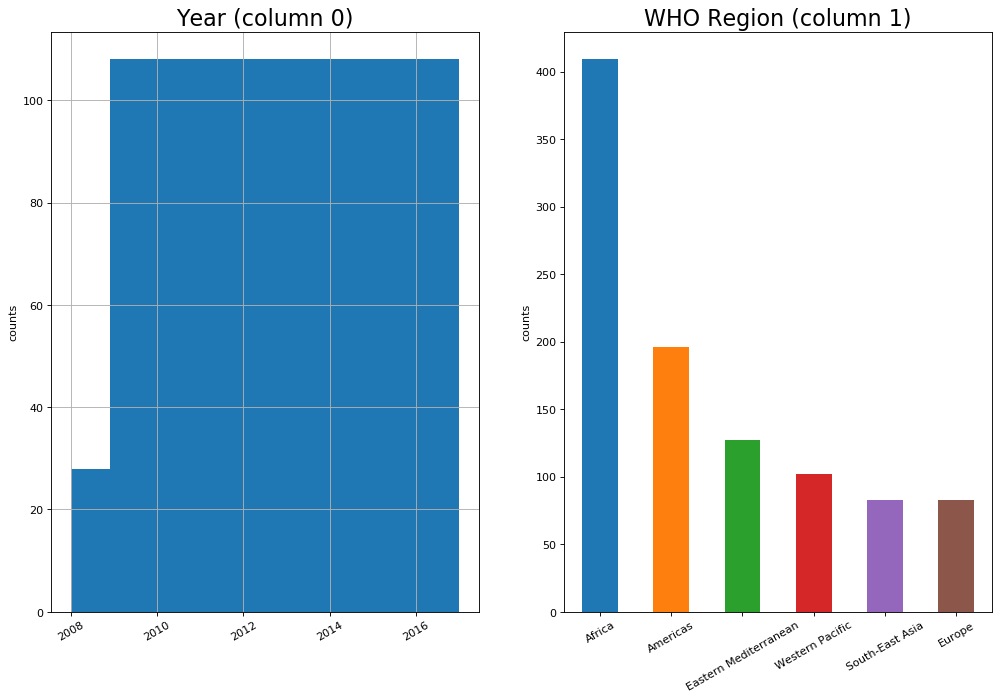

In [301]:
plotPerColumnDistribution(df3, 10, 5)

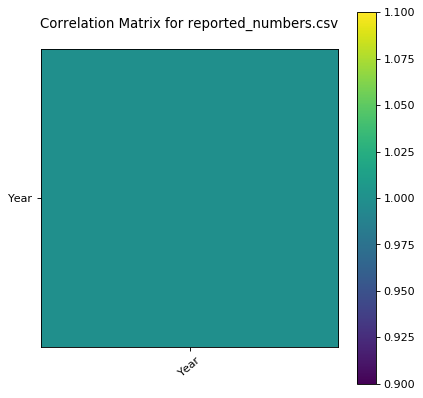

In [302]:
plotCorrelationMatrix(df3, 6)

[[1.]]


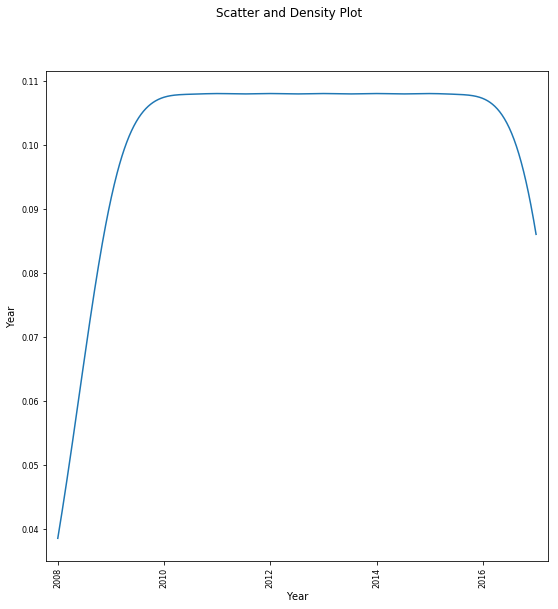

In [303]:
plotScatterMatrix(df3, 9, 12)